# Model Training

1. Import the libraries

In [2]:
# Data Processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

import warnings


warnings.filterwarnings('ignore')
%matplotlib inline


2. Import the Dataset

In [3]:
df = pd.read_csv('data/student.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


3. Prepare the Independent and Dependent features

In [4]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [14]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df.to_csv("data.csv")

In [11]:
X = df
y = df['math score'] + df['reading score'] + df['writing score']

In [12]:
X.shape, y.shape

((1000, 8), (1000,))

In [13]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [9]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


4. Create the Column transformer with the transformers

* ColumnTransformer
* OneHotEncoder
* StandardScaler

In [7]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", cat_transformer, cat_feature),
        ("StandardScaler", num_transformer, num_features)
    ]
)

In [ ]:
X = preprocessor.fit_transform(X)

In [ ]:
X.shape

(1000, 20)

5. Train test Split the data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


6. Create an evaluation metrics for all models after training

In [32]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2score = r2_score(true, predicted)
    return mae, mse, r2score

In [33]:
from xgboost import XGBRegressor

In [34]:
models = {
    "Random Forest" : RandomForestRegressor(),
    "Linear Regression" : LinearRegression(),
    "Ridge": Ridge(),
    "Lasso" : Lasso(),
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "SVR" : SVR()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train the model

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Performance
    model_train_mae, model_train_rmse, model_train_r2score = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_r2score = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print('Model Performance for Training Data')

    print(f"* Mean Absolute Error: {model_train_mae}")
    print(f"* Root Mean Squared Error: {model_train_rmse}")
    print(f"* R2 Score {model_train_r2score}")

    print('\n')
    
    print('Model Performance for Test Data')

    print(f"* Mean Absolute Error: {model_test_mae}")
    print(f"* Root Mean Squared Error: {model_train_rmse}")
    print(f"* R2 Score {model_test_r2score}")
    r2_list.append(model_test_r2score)

    print('='*35)
    print('\n')

Random Forest
Model Performance for Training Data
* Mean Absolute Error: 0.5559866666666665
* Root Mean Squared Error: 0.814899333333333
* R2 Score 0.9995353586501377


Model Performance for Test Data
* Mean Absolute Error: 1.5790400000000002
* Root Mean Squared Error: 0.814899333333333
* R2 Score 0.9941164220996328


Linear Regression
Model Performance for Training Data
* Mean Absolute Error: 1.8530954548623414e-14
* Root Mean Squared Error: 8.185641478389337e-28
* R2 Score 1.0


Model Performance for Test Data
* Mean Absolute Error: 2.0520474208751693e-14
* Root Mean Squared Error: 8.185641478389337e-28
* R2 Score 1.0


Ridge
Model Performance for Training Data
* Mean Absolute Error: 0.020908024897087783
* Root Mean Squared Error: 0.0006682309642063314
* R2 Score 0.9999996189863894


Model Performance for Test Data
* Mean Absolute Error: 0.022175396863273363
* Root Mean Squared Error: 0.0006682309642063314
* R2 Score 0.9999995912769863


Lasso
Model Performance for Training Data
* Me

# Results

In [35]:
model_list

['Random Forest',
 'Linear Regression',
 'Ridge',
 'Lasso',
 'DecisionTreeRegressor',
 'AdaBoostRegressor',
 'SVR']

In [36]:
res = list(zip(model_list, r2_list))
res

[('Random Forest', 0.9941164220996328),
 ('Linear Regression', 1.0),
 ('Ridge', 0.9999995912769863),
 ('Lasso', 0.9993296257319949),
 ('DecisionTreeRegressor', 0.9873456174265557),
 ('AdaBoostRegressor', 0.977686664961952),
 ('SVR', 0.7439480786680412)]

In [37]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=['R2 Score'], ascending=True)

,Model Name,R2 Score
6,SVR,0.743948
5,AdaBoostRegressor,0.977687
4,DecisionTreeRegressor,0.987346
0,Random Forest,0.994116
3,Lasso,0.999330
2,Ridge,1.000000
1,Linear Regression,1.000000


# Linear Regression

In [38]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f"The Accuracy is {score}")

The Accuracy is 100.0


Plot the y_pred and y_test 

Text(0, 0.5, 'Predicted')

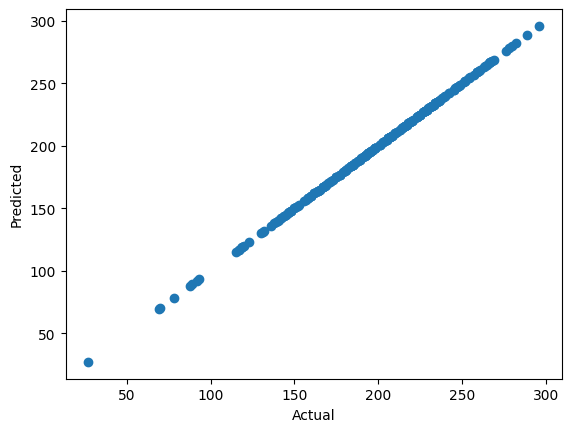

In [39]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: >

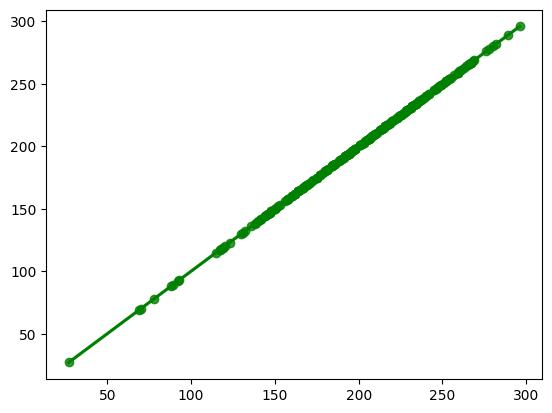

In [40]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='green')

Difference bet the predicted and actual points

In [41]:
diff = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, 'Difference':y_test - y_pred})
diff

,Actual,Predicted,Difference
521,261,261.0,0.000000e+00
737,192,192.0,5.684342e-14
740,225,225.0,0.000000e+00
660,224,224.0,0.000000e+00
411,245,245.0,0.000000e+00
...,...,...,...
109,206,206.0,5.684342e-14
430,189,189.0,0.000000e+00
77,239,239.0,0.000000e+00
84,115,115.0,5.684342e-14
